In [2]:
# !pip install datapungibea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

import datapungibea as dpb
key = '1FD5DC35-4854-4CE8-8D43-B36065C37041'
data = dpb.data(key) 
data

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# Collect county level variables
for_county_index = data.Regional(GeoFips = "COUNTY",
              LineCode = "1",
              TableName = "CAGDP9", 
              Year = "2010")
for_county_index

In [ ]:
counties = for_county_index["GeoFips"]
counties

In [ ]:
for_GDP_components = data.Regional(GeoFips = "01001",
              LineCode = "ALL",
              TableName = "CAGDP9", 
              Year = "2010")
for_GDP_components

In [ ]:
GDP_components = for_GDP_components[["Code", "Description"]]
GDP_components

In [117]:
# import time
# import random

# for row in GDP_components.iterrows():
#     full_code, description = row[1]
#     table_name, code = full_code.split("-")
   
#     try:
#         GDP_data_dct[description] = data.Regional(GeoFips = "COUNTY",
#               LineCode = code,
#               TableName = table_name, 
#               Year = "ALL")
#         print(full_code +": " + description + " downloaded")
#     except:
#         print(full_code +": Error downloading " + description)
#     time.sleep(10)

In [118]:
import os
GDP_data_dct = {}
folder1 = "Data"
folder2 = "CountyGDP"
try:
    os.mkdir(folder1)
    os.mkdir(folder1 + "/" + folder2)
except:
    try: 
        os.mkdir(folder1 + "/" + folder2)
    except:
        pass
# for key, val in GDP_data_dct.items():
#     val.to_csv(folder1 + "/" + folder2 + "/" + key.replace("/","") + ".csv")

for row in GDP_components.iterrows():
    full_code, description = row
    description = description[1]
    # somehow, space added in very last character of description
    GDP_data_dct[description] = pd.read_csv("Data/CountyGDP/" + description[:-1].replace("/","") + ".csv")
GDP_data_dct
# GDP_components

{'All industry total ':        Unnamed: 0      Code  GeoFips      GeoName  TimePeriod  \
 0               0  CAGDP9-1     1001  Autauga, AL        2001   
 1               1  CAGDP9-1     1001  Autauga, AL        2002   
 2               2  CAGDP9-1     1001  Autauga, AL        2003   
 3               3  CAGDP9-1     1001  Autauga, AL        2004   
 4               4  CAGDP9-1     1001  Autauga, AL        2005   
 ...           ...       ...      ...          ...         ...   
 62355       62355  CAGDP9-1    56045   Weston, WY        2016   
 62356       62356  CAGDP9-1    56045   Weston, WY        2017   
 62357       62357  CAGDP9-1    56045   Weston, WY        2018   
 62358       62358  CAGDP9-1    56045   Weston, WY        2019   
 62359       62359  CAGDP9-1    56045   Weston, WY        2020   
 
                                  CL_UNIT  UNIT_MULT  DataValue NoteRef  
 0      Thousands of chained 2012 dollars          3    949,800     NaN  
 1      Thousands of chained 2012 d

In [119]:
os.getcwd()

# for a,b,c in os.walk("."):
#     print(a,b,c)

'C:\\Users\\abiodun.idowu\\OneDrive - North Dakota University System\\Desktop\\PhD\\BEA project\\notebook_to_start'

In [120]:
full_df = pd.DataFrame({key[:-1]: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in GDP_data_dct.items()})
for key, val in full_df.items():
    try:
        full_df[key] = val.str.replace(
            ",","").replace("(NA)",np.NaN).replace("(D)", np.NaN).astype(float)
    except:
        continue
            
full_df

All industry total  Private industries  \
GeoFips TimePeriod                                           
1001    2001                  949800.0            811076.0   
        2002                  984039.0            831984.0   
        2003                 1008032.0            847951.0   
        2004                 1170278.0            993804.0   
        2005                 1195319.0           1018262.0   
...                                ...                 ...   
56045   2016                  305446.0            249240.0   
        2017                  300909.0            245348.0   
        2018                  315332.0            258211.0   
        2019                  322576.0            267124.0   
        2020                  312665.0            257082.0   

                    Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2001                                           22455.0   
        2002                                           18063.0   
        2003                                           39941.0   
        2004                                           49903.0   
        2005                                           59099.0   
...                                                        ...   
56045   2016                                           13871.0   
        2017                                           19901.0   
        2018                                           23787.0   
        2019                                           14194.0   
        2020                                            8653.0   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2001                                               4644.0    23121.0   
        2002                                               3053.0    53320.0   
        2003                                               3696.0    57076.0   
        2004                                               5917.0    94578.0   
        2005                                               7513.0    74428.0   
...                                                           ...        ...   
56045   2016                                              35145.0      762.0   
        2017                                              34812.0      742.0   
        2018                                              42804.0      792.0   
        2019                                              52783.0      963.0   
        2020                                              37766.0      875.0   

                    Construction  Manufacturing  Durable goods manufacturing  \
GeoFips TimePeriod                                                             
1001    2001            111710.0       211416.0                          NaN   
        2002             69905.0       212494.0                          NaN   
        2003             64250.0       182349.0                      37954.0   
        2004             65860.0       236107.0                          NaN   
        2005             55006.0       253936.0                          NaN   
...                          ...            ...                          ...   
56045   2016             11967.0        77947.0                          NaN   
        2017              8527.0       101963.0                          NaN   
        2018                 NaN            NaN                          NaN   
        2019                 NaN            NaN                          NaN   
        2020                 NaN            NaN                          NaN   

                    Nondurable goods manufacturing  Wholesale trade  ...  \
GeoFips TimePeriod                                                   ...   
1001    2001                                   NaN          22902.0  ...   
        2002                                

In [121]:
# full_df[["Private industries ", "Utilities "]]
list (full_df.keys())

['All industry total',
 'Private industries',
 'Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Durable goods manufacturing',
 'Nondurable goods manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and governme

In [122]:
inputs = ['All industry total',"Utilities", "Mining, quarrying, and oil and gas extraction", 'Agriculture, forestry, fishing and hunting']
for key in inputs:
    full_df[key + " 3YMA"] = full_df.reset_index().set_index(["TimePeriod"], drop = False).groupby("GeoFips")[key].rolling(3).mean().shift()
log_df = np.log(full_df)#.groupby("GeoFips").diff()
for key in inputs:
    log_df[key + " Volatility"] = (log_df[key].sub(log_df[key + " 3YMA"])).pow(2).pow(.5)
# for key in inputs:

- GDP 
-- layer1

In [123]:
import json

In [124]:
toc = """All industry total
1 Private industries
1.1 Agriculture, forestry, fishing and hunting
1.2 Mining, quarrying, and oil and gas extraction
1.3 Utilities
1.4 Construction
1.5 Manufacturing
1.5.1 Durable goods manufacturing
1.5.2 Nondurable goods manufacturing
1.6 Wholesale trade
1.7 Retail trade
1.8 Transportation and warehousing
1.9 Information
1.10 Finance, insurance, real estate, rental, and leasing
1.11 Finance and insurance
1.12 Real estate and rental and leasing
1.13 Professional and business services
1.14 Professional, scientific, and technical services
1.15 Management of companies and enterprises
1.16 Administrative and support and waste management and remediation services
1.17 Educational services, health care, and social assistance
1.18 Educational services
1.19 Health care and social assistance
1.20 Arts, entertainment, recreation, accommodation, and food services
1.21 Arts, entertainment, and recreation
1.22 Accommodation and food services
1.23 Other services (except government and government enterprises)
1.24 Government and government enterprises
1.25 Natural resources and mining
1.26 Trade
1.27 Transportation and utilities
1.28 Manufacturing and information
1.29 Private goods-producing industries 2/
1.30 Private services-providing industries 3/
2 """

myfile = 'GDP'

data = {myfile:{}}
for line in toc.splitlines():
    levels, title = line.split(' ', maxsplit=1)
    levels = levels.rstrip('.').split('.')
    if len(levels) == 1:
        heading = title
        data[myfile][heading] = {}
    elif len(levels) == 2:
        sub_heading = title
        data[myfile][heading][sub_heading] = []
#     if len(levels) == 3:
#         data[myfile][heading][sub_heading].append(title)

print(json.dumps(data, indent=4))

{
    "GDP": {
        "industry total": {},
        "Private industries": {
            "Agriculture, forestry, fishing and hunting": [],
            "Mining, quarrying, and oil and gas extraction": [],
            "Utilities": [],
            "Construction": [],
            "Manufacturing": [],
            "Wholesale trade": [],
            "Retail trade": [],
            "Transportation and warehousing": [],
            "Information": [],
            "Finance, insurance, real estate, rental, and leasing": [],
            "Finance and insurance": [],
            "Real estate and rental and leasing": [],
            "Professional and business services": [],
            "Professional, scientific, and technical services": [],
            "Management of companies and enterprises": [],
            "Administrative and support and waste management and remediation services": [],
            "Educational services, health care, and social assistance": [],
            "Educational services": []

In [125]:
dct = data["GDP"]
layer1 = list(dct.keys())
layer1.pop()
layer2 = []
for key in layer1:
    layer2 = layer2 + list(dct[key].keys())
layers = {0:layer1,
         1:layer2}
layers

{0: ['industry total', 'Private industries'],
 1: ['Agriculture, forestry, fishing and hunting',
  'Mining, quarrying, and oil and gas extraction',
  'Utilities',
  'Construction',
  'Manufacturing',
  'Wholesale trade',
  'Retail trade',
  'Transportation and warehousing',
  'Information',
  'Finance, insurance, real estate, rental, and leasing',
  'Finance and insurance',
  'Real estate and rental and leasing',
  'Professional and business services',
  'Professional, scientific, and technical services',
  'Management of companies and enterprises',
  'Administrative and support and waste management and remediation services',
  'Educational services, health care, and social assistance',
  'Educational services',
  'Health care and social assistance',
  'Arts, entertainment, recreation, accommodation, and food services',
  'Arts, entertainment, and recreation',
  'Accommodation and food services',
  'Other services (except government and government enterprises)',
  'Government and gover

In [126]:
layer2

['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and government enterprises)',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Transpor

In [127]:
# keys = ['Agriculture, forestry, fishing and hunting',
#  'Mining, quarrying, and oil and gas extraction',
#  'Utilities',
#  'Construction',
#  'Manufacturing',
#  'Wholesale trade',
#  'Retail trade',
#  'Transportation and warehousing',
#  'Information',
#  'Finance, insurance, real estate, rental, and leasing',
#  'Finance and insurance',
#  'Professional and business services',
#  'Educational services, health care, and social assistance',
#  'Arts, entertainment, recreation, accommodation, and food services',
#  'Other services (except government and government enterprises)',
#  'Government and government enterprises']

In [128]:
# data2 = log_df[layer2].groupby("GeoFips").diff()
# # list(log_df.keys())

In [129]:
# data2

# list(data2)
# log_df

In [130]:
data_dct = {}
data_dct["Log Data"] = np.log(full_df).replace([np.inf, -np.inf], np.nan)
data_dct["Diff"] = data_dct["Log Data"].groupby("GeoFips").diff().dropna()
data_dct["2Diff"] = data_dct["Diff"].groupby("GeoFips").diff()
data_dct

{'Log Data':                     All industry total  Private industries  \
 GeoFips TimePeriod                                           
 1001    2001                 13.764007           13.606117   
         2002                 13.799421           13.631568   
         2003                 13.823510           13.650578   
         2004                 13.972752           13.809295   
         2005                 13.993924           13.833608   
 ...                                ...                 ...   
 56045   2016                 12.629528           12.426172   
         2017                 12.614563           12.410433   
         2018                 12.661381           12.461532   
         2019                 12.684094           12.495468   
         2020                 12.652888           12.457150   
 
                     Agriculture, forestry, fishing and hunting  \
 GeoFips TimePeriod                                               
 1001    2001                    

In [145]:
from statsmodels.tsa.stattools import adfuller

def adfuller_table(df):
    df_results = {}
    for key, vector in df.items():
        dftest = adfuller(vector, maxlag = 4, regression = 'c')
        df_results[key] = pd.Series(dftest[0:4], index = ['t-stat', 'p-value', 
                                                         '#Lags Used', 'Number of Observations Used'])
    return pd.DataFrame(df_results).round(2)

In [195]:
adfuller_table(data_dct['Diff'])

,All industry total,Private industries,"Agriculture, forestry, fishing and hunting","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Durable goods manufacturing,Nondurable goods manufacturing,Wholesale trade,...,Natural resources and mining,Trade,Transportation and utilities,Manufacturing and information,Private goods-producing industries 2,Private services-providing industries 3,All industry total 3YMA,Utilities 3YMA,"Mining, quarrying, and oil and gas extraction 3YMA","Agriculture, forestry, fishing and hunting 3YMA"
t-stat,-76.51,-77.7,-44.91,-41.55,-61.36,-39.64,-46.04,-37.59,-51.09,-36.68,...,-57.28,-38.61,-43.58,-46.13,-39.88,-33.03,-33.89,-33.59,-37.47,-39.58
p-value,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
#Lags Used,0.00,0.0,4.00,4.00,1.00,4.00,3.00,4.00,2.00,4.00,...,2.00,3.00,3.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00
Number of Observations Used,6952.00,6952.0,6948.00,6948.00,6951.00,6948.00,6949.00,6948.00,6950.00,6948.00,...,6950.00,6949.00,6949.00,6949.00,6948.00,6948.00,6949.00,6948.00,6948.00,6948.00


In [1]:
data_dct['Diff'].to_csv('log diff.csv')

NameError: name 'data_dct' is not defined

In [ ]:
data_dct['Log Data'].to_csv('logged data.csv')

In [131]:
len(layer2)

30

C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


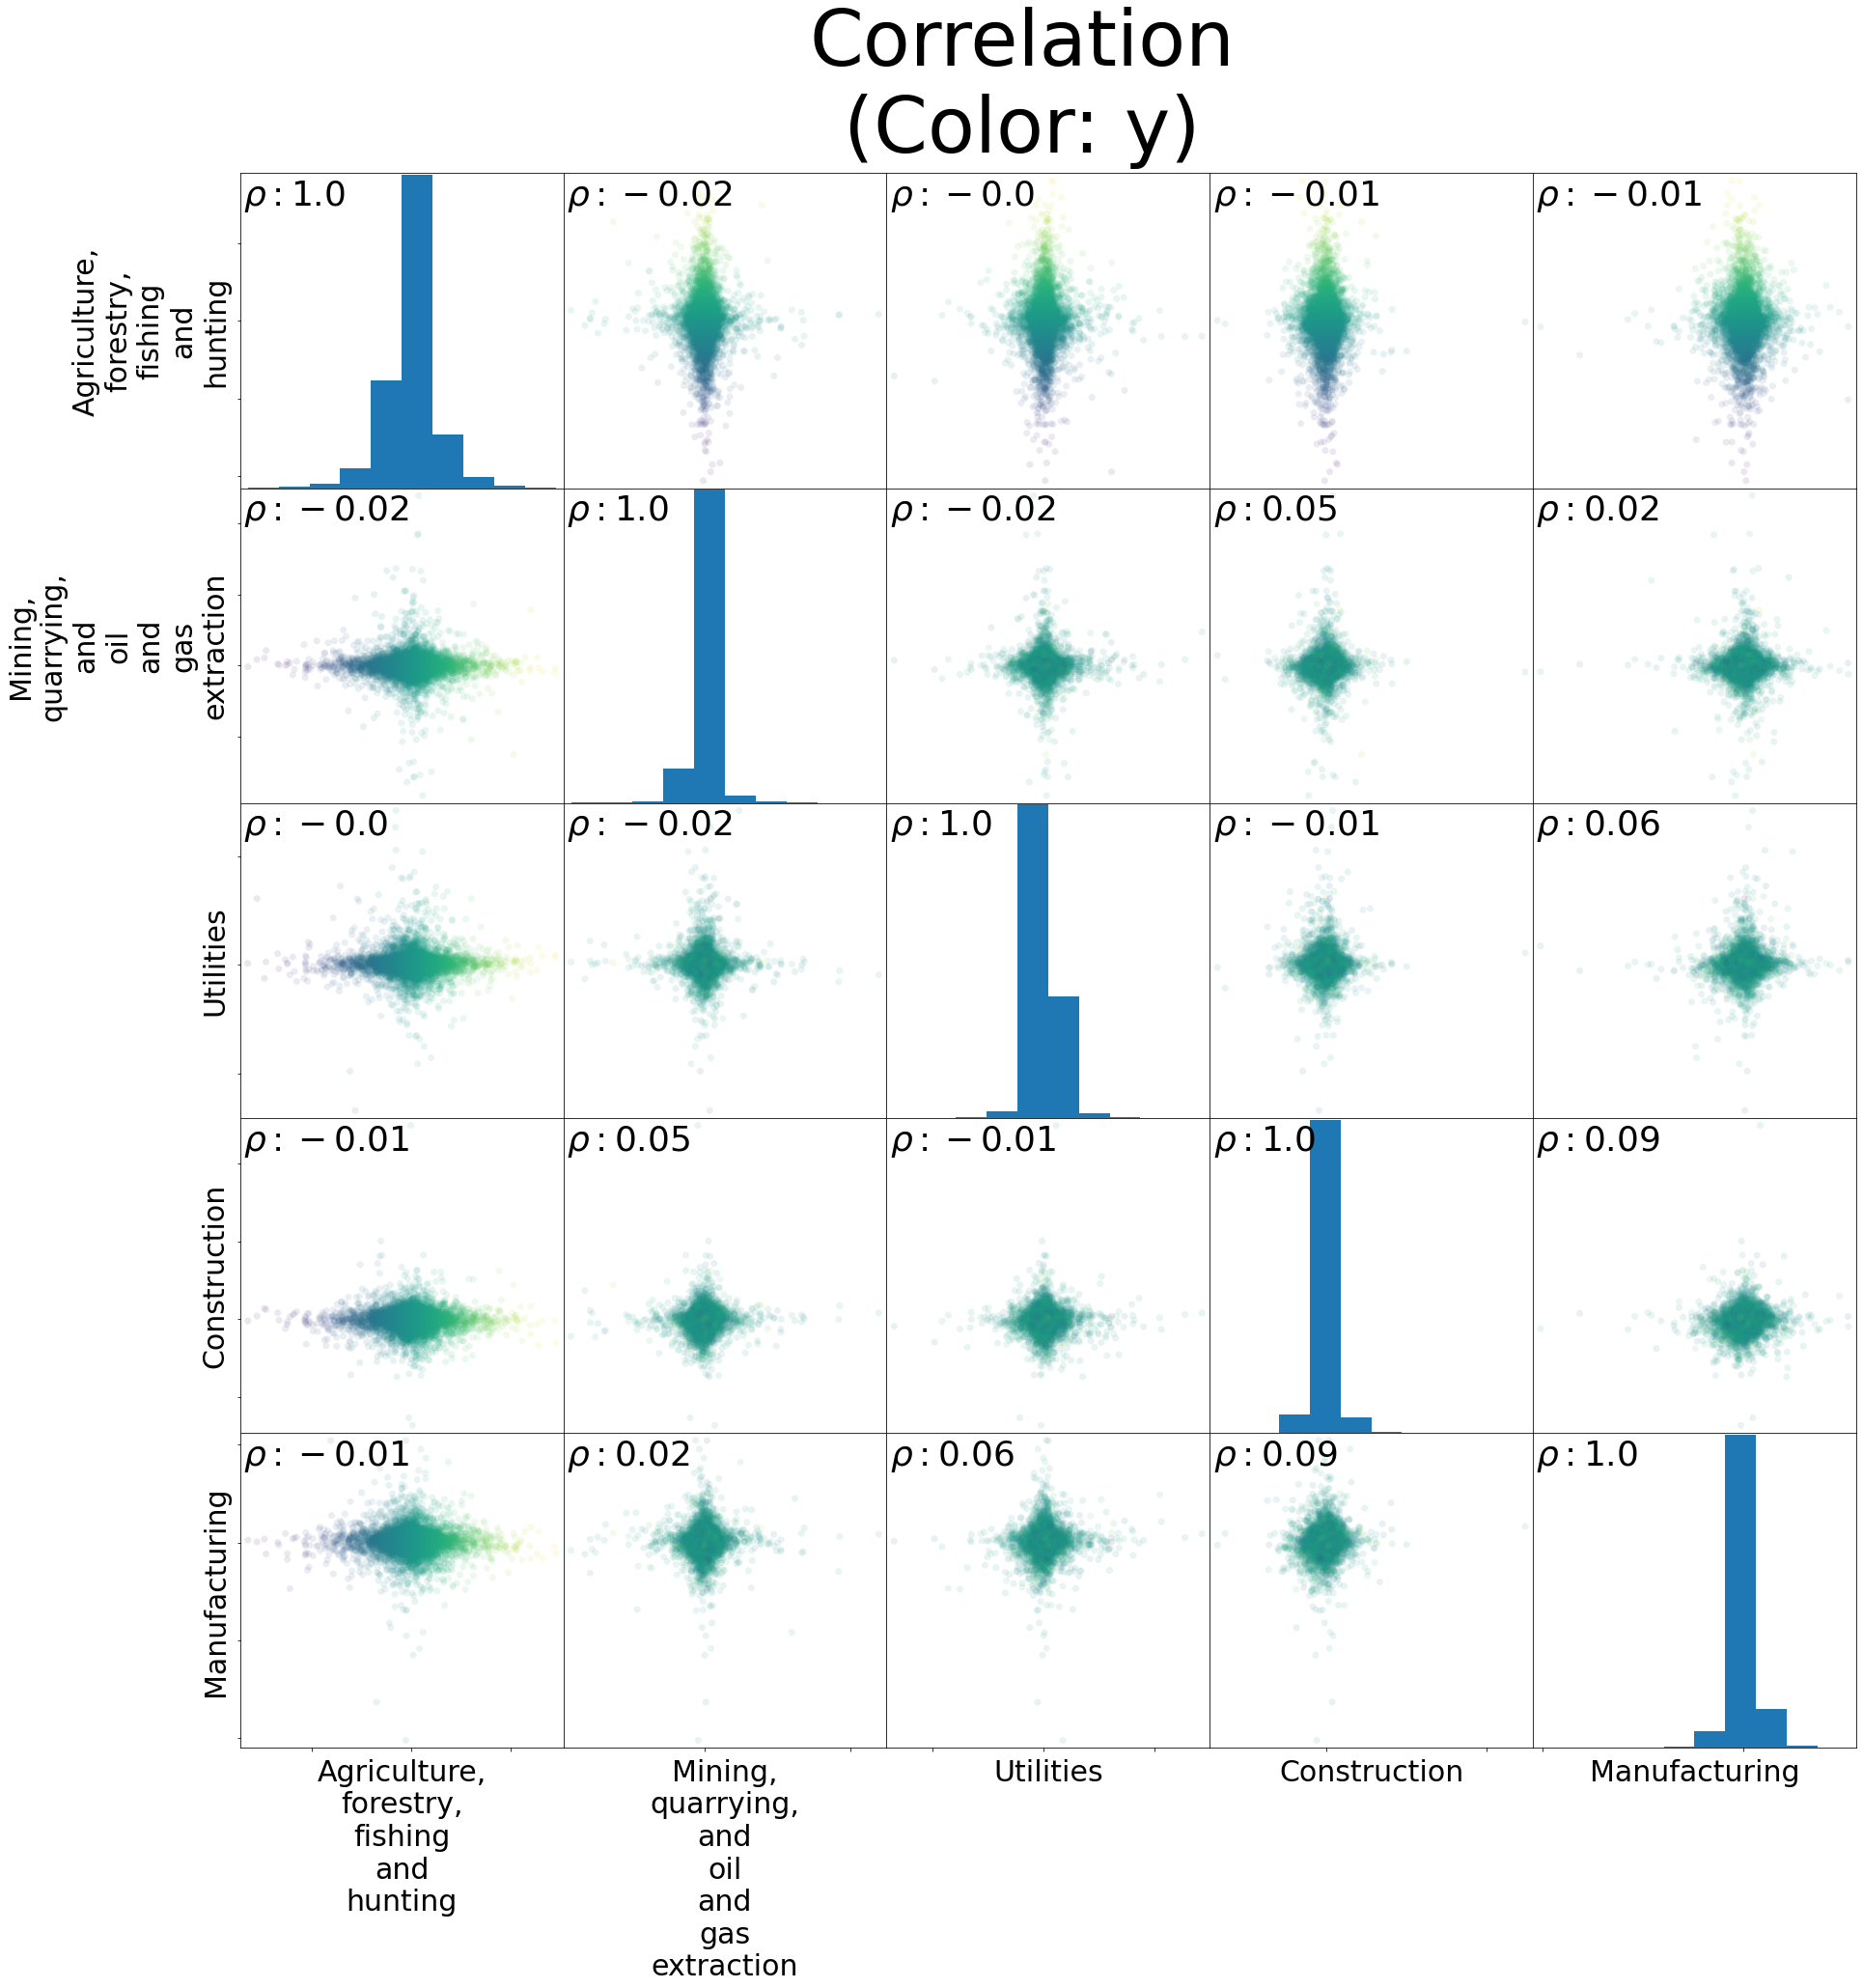

In [132]:
import pingouin
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
def full_corr_plot(data, color = "C0", pcorr = False):
    if pcorr == True:
        corr_df = data.pcorr()
    elif pcorr == False:
        corr_df = data.corr()
    keys = list(corr_df.keys())
    dim = len(keys)

    fig, ax = plt.subplots(figsize = (30, 30))
    a = pd.plotting.scatter_matrix(data, c = color, 
                                   s = 200, alpha = .1, ax=ax)  
    for i in range(len(keys)):
        x = keys[i]
        for j in range(len(keys)):
            y = keys[j]
            a[i][j].set_xticklabels([])
            a[i][j].set_yticklabels([])
            a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .88, x = 0.01, ha = "left")        
    plt.suptitle("Correlation\n(Color: y)",y = .96, fontsize = 80)
plot_df = data_dct["Diff"][layer2[:5]]
plot_df.rename(columns = {key:key.replace(" ", "\n") for key in plot_df.keys()}, inplace = True)
plot_keys = list(plot_df.keys())
full_corr_plot(plot_df, color = plot_df[plot_keys[0]], pcorr = True)
# y_var = ['Agriculture, forestry, fishing and hunting']
# x_vars = ['Mining, quarrying, and oil and gas extraction', 'Utilities', 'Construction', 'Manufacturing']
# corr_var = y_var + x_vars
# corr_data = log_df[corr_var]
# corr_data.corr().round(3)

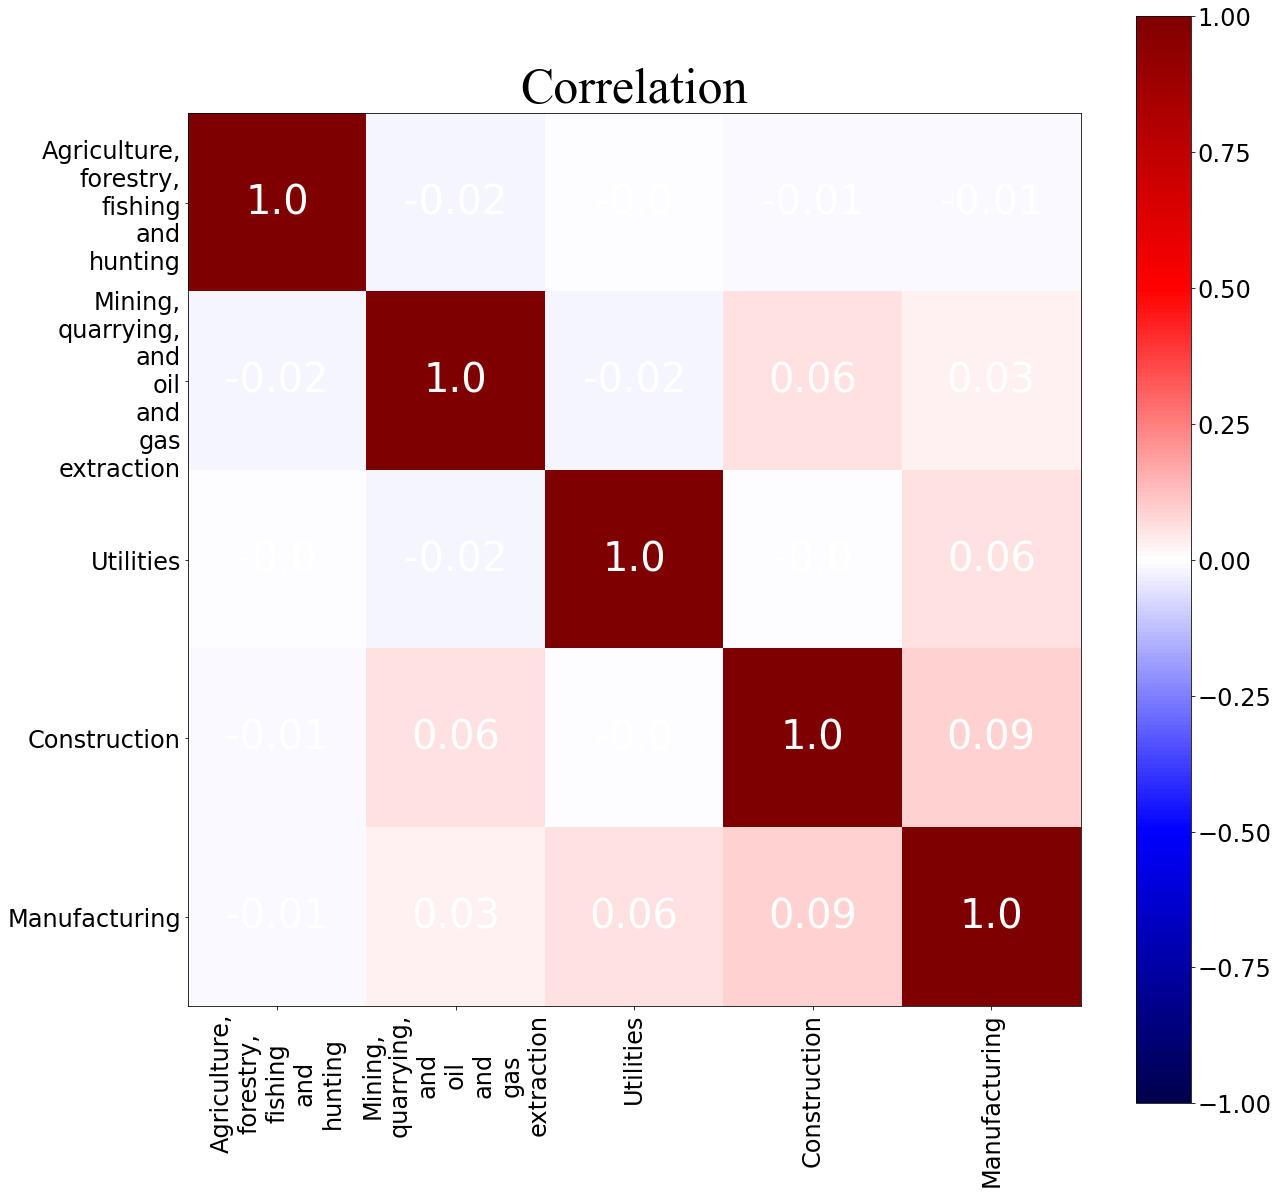

In [133]:
import numpy as np
# . . .
def corr_matrix_heatmap(data, pp = False):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if pp != False:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()

#. . . 
# . . .
corr_matrix_heatmap(plot_df.corr())


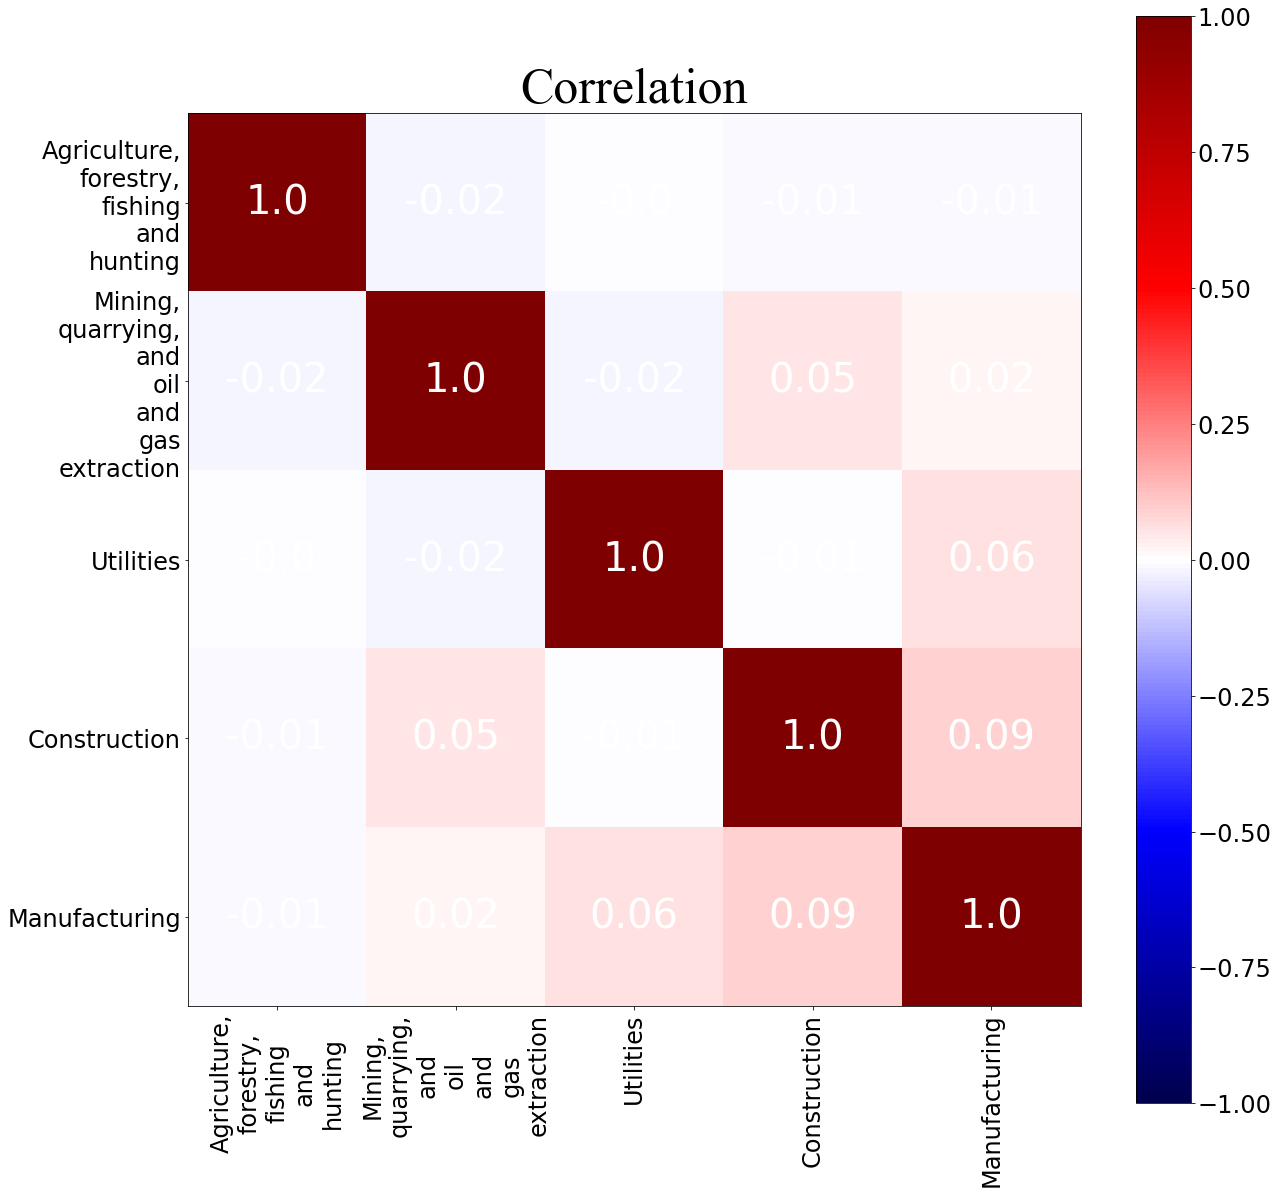

In [134]:
corr_matrix_heatmap(plot_df.pcorr())

In [102]:
# list(plot_df)

plot_df.rename(columns = {'Agriculture,\nforestry,\nfishing\nand\nhunting':'AG',
                         'Mining,\nquarrying,\nand\noil\nand\ngas\nextraction':'MQ',
                         'Utilities': 'UT',
                         'Construction':'CN',
                         'Manufacturing':'MN'}, inplace = True)
list(plot_df)

['AG', 'MQ', 'UT', 'CN', 'MN']

In [103]:
undirected_graph = {key:[] for key in plot_df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in plot_df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)
        
# undirected_graph

In [104]:
import copy
p_value = .01
def build_skeleton(plot_df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                
                c_used.append(c_var)
                test = plot_df.partial_corr(x=x, y=y, covar=c_used, method='pearson')
                if test['p-val'].values[0] > p_value:
                    
                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                    
    for x in plot_df.keys():
        ys = undirected_graph[x]
        for y in plot_df.keys():
            if x != y:
                test = plot_df.partial_corr(x = x, y = y, covar = None, method = 'pearson')
                if test['p-val'].values[0] > p_value:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in plot_df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(plot_df, undirected_graph)
undirected_graph

{'AG': [], 'MQ': ['CN'], 'UT': ['MN'], 'CN': ['MQ', 'MN'], 'MN': ['UT', 'CN']}

In [105]:
# !pip install networkx

In [106]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, plot_df, title = 'DAG Structure'):
    
    pcorr_matrix = plot_df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if(key2, key) not in edges:
                edge = (key.replace("","\n"), key2[0].replace("","\n"))
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
                
    graph.add_edges_from(edges)
    color_map = ['C0' for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1000, with_labels=True,
                     arrows=False, font_size = 20, alpha = 1, font_color = 'k', ax = ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)
    plt.axis('off')
    plt.savefig('g1.png', format='PNG')
    plt.show()

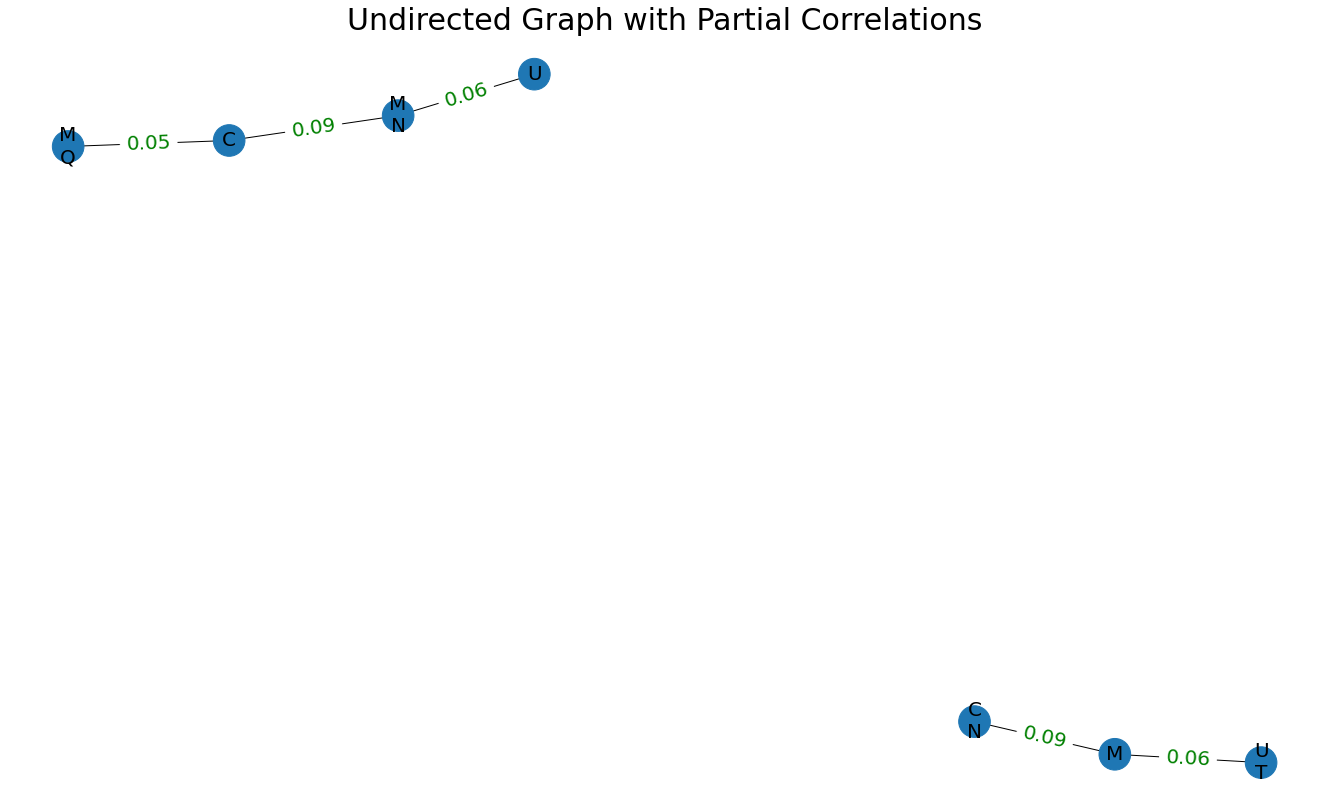

In [107]:
graph_DAG(undirected_graph, plot_df, title = 'Undirected Graph with Partial Correlations')

In [108]:
# !pip install pgmpy

In [109]:
from pgmpy.estimators import PC
c = PC(plot_df)
max_cond_vars = len(plot_df.keys()) - 2

model = c.estimate(return_type = 'dag', variant= 'parallel', significance_level = p_value,
                  max_cond_vars = max_cond_vars, ci_test = 'pearsonr')
edges = model.edges

Working for n conditional variables: 3: 100%|████████████████████████████████████████████| 3/3 [00:00<00:00,  5.71it/s]


OutEdgeView([('UT', 'MN'), ('MQ', 'CN')])

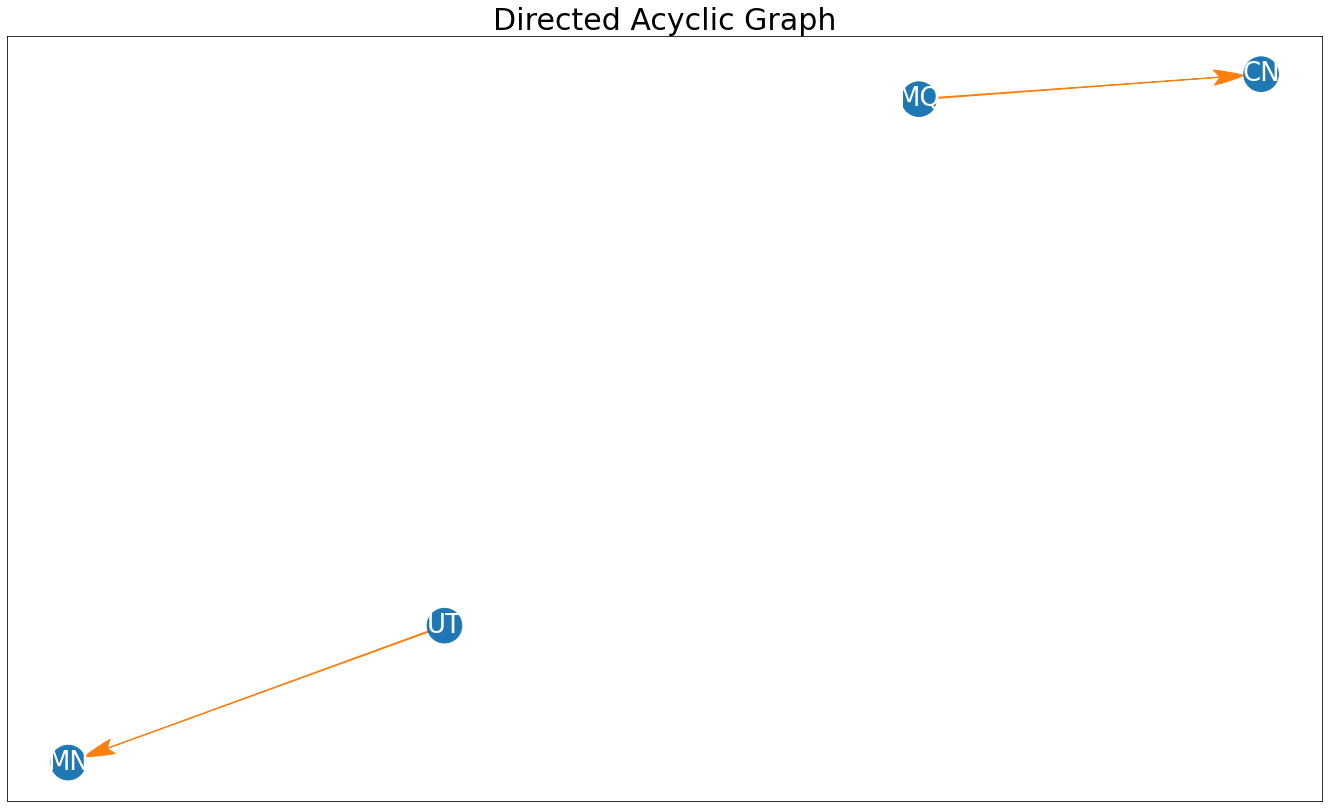

In [110]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, plot_df, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ['C0' for g in graph]
    
    fig, ax = plt.subplots(figsize = (20, 12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                    with_labels=True, arrows=True, font_color = 'white',
                    font_size = 26, alpha =1, width = 1, edge_color = 'C1',
                    arrowstyle=ArrowStyle('Fancy, head_length=3, head_width=1.5, tail_width=.1'), ax = ax)
graph_DAG(edges, plot_df, title = 'Directed Acyclic Graph')
edges

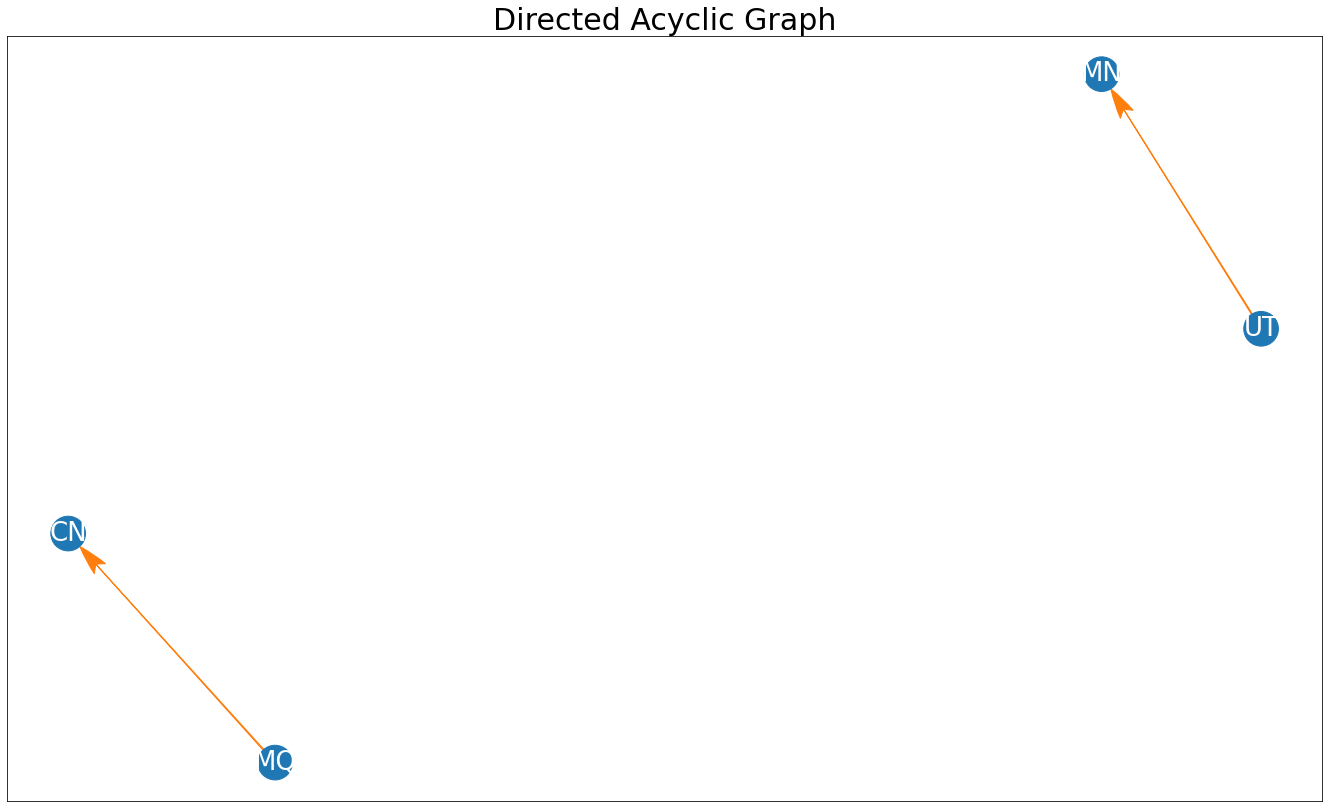

In [100]:
def grap_DAG(edges, plot_df, title = ""):
    graph = nx.Graph()
    edge_labels = {}
    for edge in edges:
        controls = [key for key in plot_df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print('keep control:', control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = plot_df[[edge[0], edge[1]]+keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ['C0' for g in graph]
    
    fig, ax = plt.subplots(figsize = (20, 12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200, with_labels=True,
                    arrows=True, font_color ='k', font_size=26, alpha=1, width = 1,
                    edge_color = 'C1',
                     arrowstyle=ArrowStyle('Fancy, head_length=3, head_width=1.5, tail_width=.1'), ax = ax)
    nx.draw_netwrokx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)
    
graph_DAG(edges, plot_df, title = 'Directed Acyclic Graph')
                                                             

# research on panel dickey fuller, 

Augmented Dickey fuller regression
1. LLC test
2. IPS test
3. Fisher-type test

cross-sectional dependence
1. cross-sectionally augmented Dickey-Fuller (CADF) test
2. Chang test

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def color_dim_scatter(plot_df, pp):  
    # function uses color as dimension in scatter plot  
    for key1 in data:  
        for key2 in data:  
            # do not use same variable for x and y dimension  
            for key3 in data:  
                    # do not create visualization if key1 or key2  
                    # equals key3  
                    if key1 != key2 and key1 != key3 and key2 != key3:  
                        print(key1,key2,key3)
                        # Choose figure size and save ax as object  
                        fig, ax = plt.subplots(figsize = (20, 20))  
                        # each point represents an observation with 3 different  
                        # values: key1 on the horiz ax, key2 on the vert ax,   
                        # and key3 as color  
                        data.plot.scatter(x = key1, y = key2, c = key3, s = 50,  
                                          alpha = .7, colormap = "viridis",  
                                          ax = ax)  
                        # Make values on x-axis vertical  
                        plt.xticks(rotation = 90)  
                        # Remove tick lines  
                        plt.setp(ax.get_xticklines(), visible = False)  
                        plt.setp(ax.get_yticklines(), visible = False)  
                        plt.show()  
                        pp.savefig(fig, bbox_inches = "tight")  
                        plt.close()  
# . . .
# Save plots in a pdf using PdfPages
pp = PdfPages("BEA.pdf")
# set default size of font in figures
plt.rcParams.update({"font.size" : 26})
# select subset of variables ot visualize in scatter plot
color_dim_scatter(plot_df, pp)

In [ ]:
# from datlib.plots import *
# corr_matrix_heatmap(log_df.corr(), 
#                     save_fig = False, 
#                     pp = None, 
#                     title = "Correlation")
# corr_matrix_heatmap(log_df.pcorr(), save_fig = False, pp = None, title = "Partial Correlation")



In [ ]:
# sns.heatmap(corr_data.corr());

In [ ]:
# list(log_df)

In [ ]:
# log_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
# log_diff.dropna(inplace=True)


In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
def durbin_watson(res_df, res_name):
    res = res_df[res_name]
    res_lag = res_df[res_name + " Lag"]
    dw = res.sub(res_lag).pow(2).sum() / res.pow(2).sum()
    return dw
# ADF
dw = {}
for diff, data in data_dct.items():
    dw[diff] = {}
#     data = data[layer2]
    for key in data:
        
#         res_ADF_aut = sm.tsa.stattools.adfuller(data[key].dropna(), maxlag = 1, autolag = None,
#                                                regression="c", regresults = True)
        lag_name = key + " Lag"
        reg_data = data[[key]]
        reg_data[lag_name] = data[key].groupby("GeoFips").shift()
        reg_data.loc[:, "constant"] = 1
        reg_data.dropna(inplace=True)
        y = reg_data[key]
        X = reg_data[[lag_name]]#, "constant"]]
        lag_reg = sm.OLS(y,X)
        result = lag_reg.fit()
        #     tests[diff]["ADF"] = res_ADF_aut[0]
        #     tests[diff]["ADF"] = res_ADF_aut[1]
        ry_name = "$\mu$"
        reg_data[ry_name] = result.resid
        reg_data[ry_name + " Lag"] = reg_data["$\mu$"].groupby("GeoFips").shift() 
        res_df = reg_data[[ry_name, ry_name + " Lag"]]
        dw[diff][key] = durbin_watson(res_df.dropna(), ry_name)
        
        
        
2 - pd.DataFrame(dw).round(1)

In [ ]:
# layer2

In [ ]:
import linearmodels as lm
reg_data = data_dct["Diff"].copy()
reg_data.rename(columns = {"All industry total":"y",
                          "Mining, quarrying, and oil and gas extraction":"X1",
                           "Manufacturing":"X2",
                          "Real estate and rental and leasing":"X3",
                          "Management of companies and enterprises":"X4",
                          "Accommodation and food services":"X5",
                          "Natural resources and mining":"X6"}, inplace = True)
reg_data["TimePeriod"] = reg_data.index.get_level_values("TimePeriod")
# reg_data["Constant"] = 1
y_name = ["y"]
lag_name = y_name[0] + " Lag"
x_names = [lag_name, "X1", "X2", "X3", "X4", "X5", "X6"]#, "Constant"]
reg_data[lag_name] = reg_data[y_name].groupby("GeoFips").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_name]
X = reg_data[x_names]
lag_reg = sm.OLS(y,X)
results = lag_reg.fit(cov_type = "HAC", 
                      cov_kwds = {"maxlags":1})
results.summary()

In [ ]:
corr_df = reg_data[y_name + x_names].corr()
corr_df

In [ ]:
# !pip install arch

In [ ]:
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import KPSS

def adfuller_table(df):
    df_results = {}
    for key, vector in df.items():
        dftest = adfuller(vector, maxlag = 4, regression = 'c')
        df_results[key] = pd.Series(
            dftest[0:4],
            index=['t-stat',
                  'p-value',
                  '#Lags Used',
                  'Number of Observations Used',
                  ])
        return pd.DataFrame(df_results).round(2)
    
# def kpss_table(df):
#     df_results = {}
#     for key, vector in df.items():
#         df_results[key] = {}
#         kpss_test = KPSS(vector, trend = 'c', lags = 4)
#         df_results[key]['t-stat'] = kpss_test.stat
#         df_results[key]['p-value'] = kpss_test.pvalue
#         df_results[key]['Result'] = kpss_test.null_hypothesis if kpss_test.pvalue > .05 else 'Reject:' + kpss_test.alternative_hypothesis
        
#     return pd.DataFrame(df_results).round(2)

In [ ]:
# adfuller_table(log_Diff)

In [ ]:

from linearmodels import PooledOLS
import statsmodels.api as sm

exog = sm.tools.tools.add_constant(log_df['Utilities'])
endog = log_df['Y']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [ ]:
#Homoskedasticity
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt

In [ ]:
#White Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

pooled_OLS_dataset = pd.concat([log_df, residuals_pooled_OLS], axis = 1)
# pooled_OLS_dataset = pooled_OLS_dataset.drop(['TimePeriod'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(log_df['Utilities']).fillna(0)

white_test_results = het_white(pooled_OLS_dataset['residual'], exog)

labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, white_test_results)))


In [ ]:
#Breusch Pagan Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, breusch_pagan_test_results)))

In [ ]:
#Non-Autocorrelation
durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual'])
durbin_watson_test_results

In [ ]:
# log_df.rename(columns = {'All industry total': 'Y'}, inplace = True)

# log_df

In [ ]:
# FE and RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects

exog = sm.tools.tools.add_constant(log_df['Utilities'])
endog = log_df['Y']

#RE model
model_re = RandomEffects(endog, exog)
re_res = model_re.fit()

#FE model
model_fe = PanelOLS(endog, exog, entity_effects = True)
fe_res = model_fe.fit()

re_res

In [ ]:
fe_res

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
   
df = b[np.abs(b) < 1e8].size

chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

pval = stats.chi2.sf(chi2, df)

return chi2, df, pval

hausman_results = hausman(fe_res, re_res)
print('chi-Squared:' + str(hausman_results[0]))
print('degrees of freedom:' + str(hausman_results[1]))
print('p-value:' + str(hausman_results[2]))